In [1]:
import cv2
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

In [2]:
im1 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1805.jpg')
im2 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1806.jpg')
im3 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1807.jpg')

In [3]:
image1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

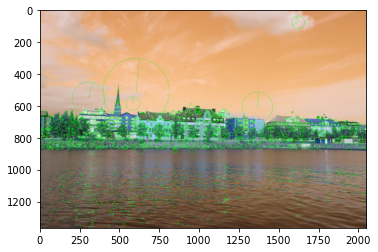

In [4]:
siftobject = cv2.xfeatures2d.SIFT_create()
keypoint1, descriptor1 = siftobject.detectAndCompute(image1, None)
keypoint2, descriptor2 = siftobject.detectAndCompute(image2, None)
keypoint3, descriptor3 = siftobject.detectAndCompute(image3, None)

keypointimage = cv2.drawKeypoints(im1, keypoint1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imshow('SIFT', keypointimage)
# cv2.waitKey()
plt.imshow(keypointimage)
plt.show()

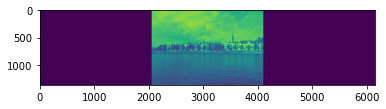

In [6]:
height = image1.shape[0]
width = image1.shape[1]
src = np.float32([[0,0], [(width-1),0], [0, (height-1)], [(width-1), (height-1)]])
dst = np.float32([[width,0], [2*width-1,0], [width, height-1], [2*width-1, height-1]])
resmatrix = cv2.getPerspectiveTransform(src, dst)
resultimage = cv2.warpPerspective(image2, resmatrix, (3*width, height))
# cv2.imshow('resultimage', resultimage)
# cv2.waitKey()
plt.imshow(resultimage)
plt.show()


In [11]:
src

array([[1699.4581 ,  822.4587 ],
       [ 898.7906 ,  743.57935],
       [ 713.0935 ,  765.61584],
       [ 237.97305, 1082.2167 ]], dtype=float32)

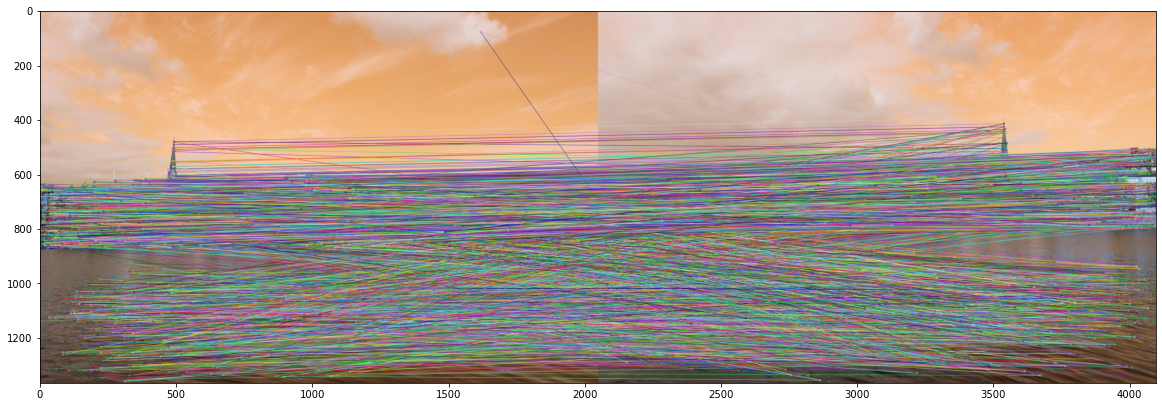

In [8]:
bf = cv2.BFMatcher()
mat1 = bf.match(descriptor1, descriptor2)
matches1 = sorted(mat1, key = lambda x:x.distance)
mat2 = bf.match(descriptor2, descriptor3)
matches2 = sorted(mat2, key = lambda x:x.distance)

matched_image = cv2.drawMatches(im1, keypoint1, im2, keypoint2, matches1, None, flags=2)
# cv2.imshow('matched_image', matched_image)
# cv2.waitKey()
plt.figure(figsize = (20,20))
plt.imshow(matched_image)
plt.show()

In [9]:
## match for 1st and 2nd img
list_kp1 = []
list_kp2 = []
for mat in matches1:
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = keypoint1[img1_idx].pt
    (x2, y2) = keypoint2[img2_idx].pt
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [5]:
pts1 = cv2.KeyPoint_convert(keypoint1)
pts2 = cv2.KeyPoint_convert(keypoint2)
pts3 = cv2.KeyPoint_convert(keypoint3)


In [10]:
all_points = np.arange(len(list_kp1))
random_points = np.random.choice(all_points, 4)
p1 = []
p2 = []
for p in random_points:
    p1.append(list(list_kp1[p]))
    p2.append(list(list_kp2[p]))
# src = np.array(p1).reshape(4,2).squeeze()
# dst = np.array(p2).reshape(4,2).squeeze()
src = np.float32(p1)
dst = np.float32(p2)

M, mask = cv2.findHomography(src, dst, cv2.RANSAC,5)
matchesMask = mask.ravel().tolist()
#print(mask)
# resmatrix = cv2.getPerspectiveTransform(src, dst)
# resultimage = cv2.warpPerspective(image2, resmatrix, (3*width, height))
# plt.imshow(resultimage)
# plt.show()

h,w,d = im1.shape
#pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts = np.float32(pts1).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
#print(len(dst))

# im2 = cv2.polylines(im2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
# img3 = cv2.drawMatches(im1,keypoint1,im2,keypoint2,None,**draw_params)
# plt.imshow(img3, 'gray'),plt.show()